In [43]:
# is a basic house price predcition based on various factors where we took only fex features into consideration and we used linear regression at first and them tried with random forest

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
data= pd.read_csv("housing.csv")

In [45]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [46]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
mydata=data.dropna()

In [49]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [50]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X= mydata.drop(['median_house_value'], axis=1)

In [53]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [54]:
y=mydata['median_house_value']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [56]:
train_data=X_train.join(y_train)

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 7519 to 7239
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

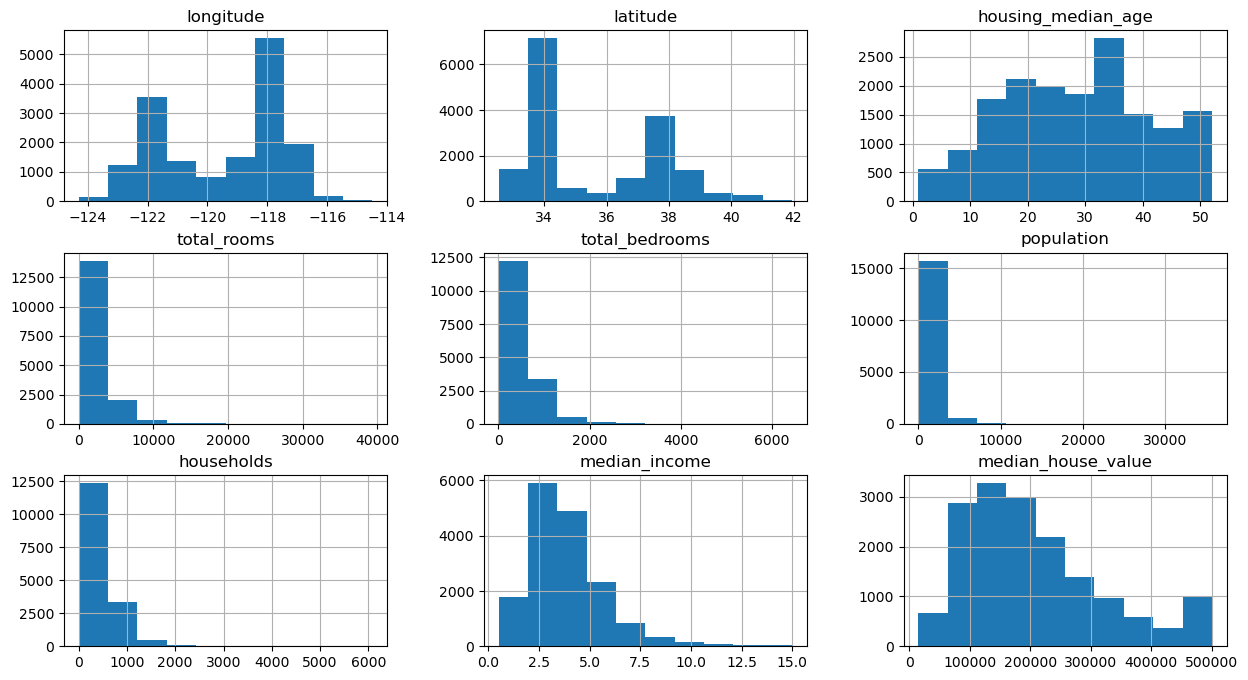

In [58]:
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

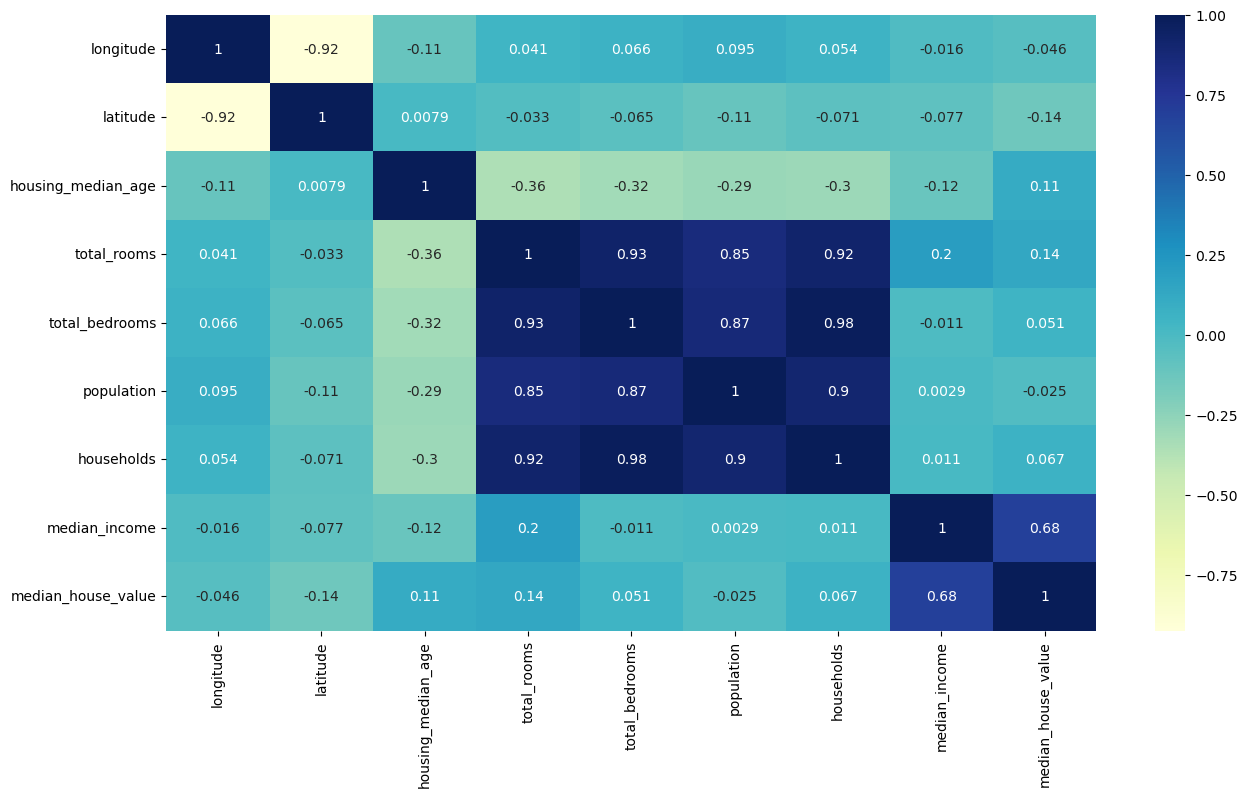

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # we should look at the correlation with the median house value

In [60]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

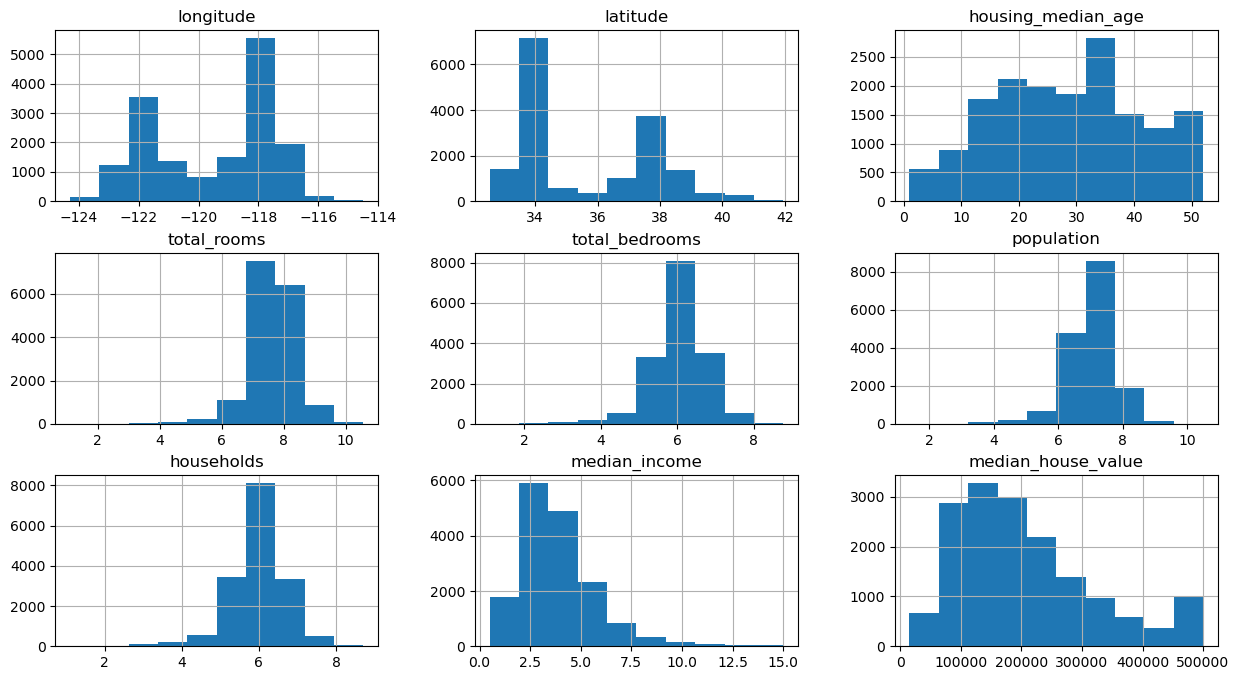

In [61]:
train_data.hist(figsize=(15, 8))

In [62]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [63]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7519,-118.26,33.91,39.0,6.841615,5.351858,6.568078,5.267858,2.4375,101900.0,1,0,0,0,0
19077,-122.49,38.27,8.0,8.535622,6.896694,7.413367,6.842683,3.5625,213200.0,0,0,0,1,0
10793,-117.92,33.62,35.0,7.507690,5.817111,6.590301,5.758902,6.5842,458500.0,1,0,0,0,0
19518,-121.01,37.64,33.0,6.542472,5.337538,6.395262,5.262690,1.0217,81300.0,0,1,0,0,0
15874,-122.40,37.75,52.0,7.075809,5.730100,6.937314,5.726848,2.0577,214600.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14049,-117.13,32.76,27.0,7.732369,6.545350,7.119636,6.499787,1.9392,142900.0,0,0,0,0,1
2294,-119.74,36.80,18.0,9.293118,7.784057,8.606485,7.700748,2.4678,74300.0,0,1,0,0,0
11840,-120.93,39.90,20.0,7.321189,5.796058,6.674561,5.771441,2.0221,70900.0,0,1,0,0,0
19960,-119.25,36.23,24.0,7.608871,5.874931,6.939254,5.863631,3.4306,139200.0,0,1,0,0,0


<AxesSubplot:>

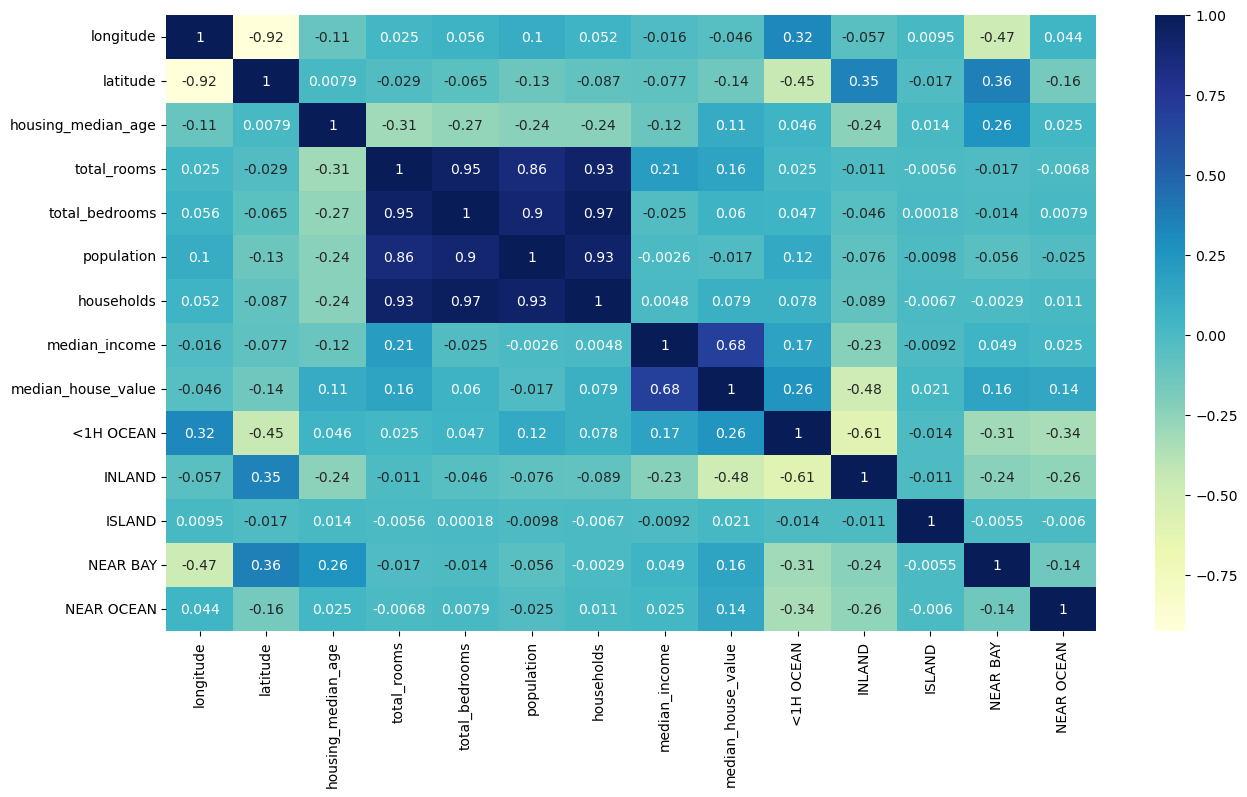

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # we should look at the correlation with the median house value

In [65]:
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']

train_data['household_room']= train_data['households'] / train_data['total_rooms']

In [66]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
7519,-118.26,33.91,39.0,6.841615,5.351858,6.568078,5.267858,2.4375,101900.0,1,0,0,0,0,0.782251,0.769973
19077,-122.49,38.27,8.0,8.535622,6.896694,7.413367,6.842683,3.5625,213200.0,0,0,0,1,0,0.807990,0.801662
10793,-117.92,33.62,35.0,7.507690,5.817111,6.590301,5.758902,6.5842,458500.0,1,0,0,0,0,0.774820,0.767067
19518,-121.01,37.64,33.0,6.542472,5.337538,6.395262,5.262690,1.0217,81300.0,0,1,0,0,0,0.815829,0.804389
15874,-122.40,37.75,52.0,7.075809,5.730100,6.937314,5.726848,2.0577,214600.0,0,0,0,1,0,0.809816,0.809356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14049,-117.13,32.76,27.0,7.732369,6.545350,7.119636,6.499787,1.9392,142900.0,0,0,0,0,1,0.846487,0.840595
2294,-119.74,36.80,18.0,9.293118,7.784057,8.606485,7.700748,2.4678,74300.0,0,1,0,0,0,0.837615,0.828651
11840,-120.93,39.90,20.0,7.321189,5.796058,6.674561,5.771441,2.0221,70900.0,0,1,0,0,0,0.791683,0.788320
19960,-119.25,36.23,24.0,7.608871,5.874931,6.939254,5.863631,3.4306,139200.0,0,1,0,0,0,0.772116,0.770631


<AxesSubplot:>

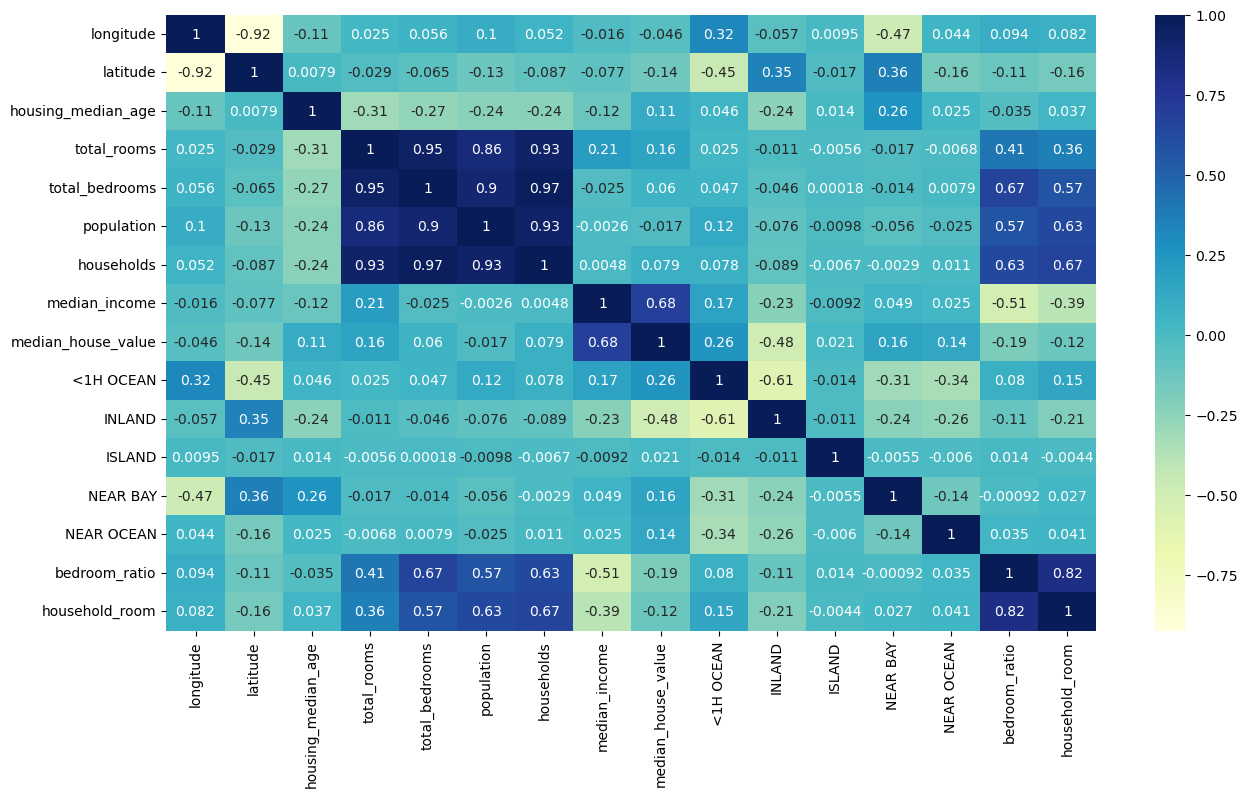

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # we should look at the correlation with the median house value

In [68]:
## no we start with simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

X_train_s= scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [69]:
test_data= X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms'] / test_data['total_rooms']

test_data['household_room']= test_data['households'] / test_data['total_rooms']

In [70]:
X_test, y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [71]:
X_test_s= scaler.transform(X_test)


In [72]:
reg.score(X_test_s, y_test)

0.6757502532731506

In [ ]:
### now we will test with random forest 

In [74]:
from sklearn.ensemble import RandomForestRegressor

random_forest= RandomForestRegressor()

random_forest.fit(X_train, y_train)



RandomForestRegressor()

In [75]:
random_forest.score(X_test, y_test)

0.8235125954192462